# NAMA : RAHMAT FEBRIANSYAH
# NIM : 09011381722133
# KELAS : SK5U
# KECERDASAN BUATAN

=====================================================================================================================

# KLASIFIKASI HEWAN DI KEBUN BINATANG MENGGUNAKAN ANN

=====================================================================================================================

# 1. Import Library

Librabry yang digunakan adalah sebagai berikut:

### Numpy 
Digunakan Untuk Menginput Array

### Pandas
Fungsinya Seperti Numpy, Namun Lebih Kearah Matriks Dengan Baris Dan Kolom Yang Telah Dimuat Dalam Bentuk Tabel

### Matplotlib
Digunakan Untuk Membuat Grafik

### Seaborn
Digunakan Untuk Visualisasi Data Secara Statistik

In [49]:
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.activations import relu

# 2. Import Dataset

Dataset yang digunakan adalah 'zoo'. Berisi mengenai ciri-ciri dari hewan yang akan dikelompokkan sebagai features dan class_type sebagai label atau output. Isi dataset terdiri dari

#### Features
1. animal_name
2. hair
3. feathers
4. eggs
5. milk
6. airborne
7. aquatic
8. predator
9. toothed
10. backbone
11. breathes
12. venomous
13. fins
14. legs
15. tail
16. domestic
17. catsize

#### Labels
18. class_type

In [50]:
dataset = pd.read_csv('zoo.csv')

In [51]:
dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# 3. Mengecek Informasi Dataset

Digunakan untuk melihat apakah pada dataset yang digunakan terdapat data kosong atau data yang tidak ada isi. Dari dataset yang digunakan dapat dilihat bahwa tidak ada data kosong (non-null)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# 4. Visualisasi data

melihat berapa banyak persentase dari label 
#### class_tpye1 : 40.5940594059406 %
#### class_tpye2 : 19.801980198019802 %
#### class_tpye3 : 4.9504950495049505 %
#### class_tpye4 : 12.871287128712872 %
#### class_tpye5 : 3.9603960396039604 %
#### class_tpye6 : 7.920792079207921 %
#### class_tpye7 : 9.900990099009901 %

In [53]:
All = dataset.shape[0]
class_type1 = dataset[dataset['class_type'] == 1]
class_type2 = dataset[dataset['class_type'] == 2]
class_type3 = dataset[dataset['class_type'] == 3]
class_type4 = dataset[dataset['class_type'] == 4]
class_type5 = dataset[dataset['class_type'] == 5]
class_type6 = dataset[dataset['class_type'] == 6]
class_type7 = dataset[dataset['class_type'] == 7]

o = len(class_type1)/All
p = len(class_type2)/All
q = len(class_type3)/All
r = len(class_type4)/All
s = len(class_type5)/All
t = len(class_type6)/All
u = len(class_type7)/All


print('class_tpye1 :',o*100,'%')
print('class_tpye2 :',p*100,'%')
print('class_tpye3 :',q*100,'%')
print('class_tpye4 :',r*100,'%')
print('class_tpye5 :',s*100,'%')
print('class_tpye6 :',t*100,'%')
print('class_tpye7 :',u*100,'%')

class_tpye1 : 40.5940594059406 %
class_tpye2 : 19.801980198019802 %
class_tpye3 : 4.9504950495049505 %
class_tpye4 : 12.871287128712872 %
class_tpye5 : 3.9603960396039604 %
class_tpye6 : 7.920792079207921 %
class_tpye7 : 9.900990099009901 %


Text(0, 0.5, 'Frequency')

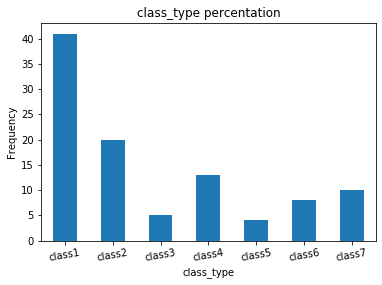

In [54]:
labels = ['class1','class2','class3','class4','class5','class6','class7']
classes = pd.value_counts(dataset['class_type'], sort = False)
classes.plot(kind = 'bar', rot=10)
plt.title("class_type percentation")
plt.xticks(range(7), labels)
plt.xlabel("class_type")
plt.ylabel("Frequency")

# 5. Menentukan Features dan Labels

Features dilambangkan dengan huruf X , sedangkan Labels dilambangkan dengan huruf Y. Features dimulai dari kolom 1 sampai kolom 17 dan Labels ada di kolom 18

In [55]:
X = dataset.iloc[:, 1:17].values
y = dataset.iloc[:, -1].values

In [56]:
y[:][y[:]==7]=int(0)
X[:,12][X[:,12]==2]=int(1)
X[:,12][X[:,12]==4]=int(2)
X[:,12][X[:,12]==6]=int(3)
X[:,12][X[:,12]==8]=int(4)

In [57]:
y_som = y

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
X12 = onehotencoder.fit_transform(X[:, 12].reshape(-1, 1)).toarray()
y = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integ

In [58]:
y = np.asarray(y, dtype = int)
X12 = np.asarray(X12, dtype = int)
Xnew = np.append(X, X12, axis=1)
X = np.delete(Xnew, 12, axis=1)

# 6. Splitting Data dan Modeling

file test yang digunakan berukuran 20 % dari jumlah keseluruhan data yang tersedia. Setelah itu kita membuat model NN dengan menggunakan sebanyak 100 hiden layer pertama dan sebanyak 50 hiden layer kedua dan sebanyak 50 hiden layer ketiga. kemudian kita membuat output layer sebanyak 7 layer sesuai dengan data Class_type pada Dataset

In [59]:
from sklearn.model_selection import train_test_split
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y)

In [60]:
model = Sequential()
model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = relu, input_dim = X_training.shape[1]))
model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = relu))
model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = relu))
model.add(Dropout(0.5))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer=Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.save('model.h5')

### Proses Epoch

Proses Epoch yang dilakukan adalah sebanyak 250 kali dengan besar batch_size = 50

In [61]:
acc_training = model.fit(X_training, y_training, validation_data=(X_testing, y_testing), batch_size = 50, epochs = 250)
acc_testing = model.evaluate(X_testing, y_testing)

Train on 80 samples, validate on 21 samples
Epoch 1/250
80/80 [==============================] - 0s 5ms/step - loss: 1.9457 - accuracy: 0.2750 - val_loss: 1.9451 - val_accuracy: 0.5238
Epoch 2/250
80/80 [==============================] - 0s 415us/step - loss: 1.9447 - accuracy: 0.5000 - val_loss: 1.9441 - val_accuracy: 0.5714
Epoch 3/250
80/80 [==============================] - 0s 686us/step - loss: 1.9438 - accuracy: 0.5375 - val_loss: 1.9430 - val_accuracy: 0.5714
Epoch 4/250
80/80 [==============================] - 0s 399us/step - loss: 1.9423 - accuracy: 0.5875 - val_loss: 1.9415 - val_accuracy: 0.5714
Epoch 5/250
80/80 [==============================] - 0s 199us/step - loss: 1.9405 - accuracy: 0.5625 - val_loss: 1.9397 - val_accuracy: 0.5714
Epoch 6/250
80/80 [==============================] - 0s 228us/step - loss: 1.9387 - accuracy: 0.5125 - val_loss: 1.9374 - val_accuracy: 0.4762
Epoch 7/250
80/80 [==============================] - 0s 199us/step - loss: 1.9364 - accuracy: 0.5250

Epoch 58/250
80/80 [==============================] - 0s 181us/step - loss: 0.7755 - accuracy: 0.6000 - val_loss: 0.7464 - val_accuracy: 0.5714
Epoch 59/250
80/80 [==============================] - 0s 175us/step - loss: 0.7151 - accuracy: 0.6875 - val_loss: 0.7264 - val_accuracy: 0.6190
Epoch 60/250
80/80 [==============================] - 0s 150us/step - loss: 0.6879 - accuracy: 0.6750 - val_loss: 0.7073 - val_accuracy: 0.6190
Epoch 61/250
80/80 [==============================] - 0s 137us/step - loss: 0.6995 - accuracy: 0.7000 - val_loss: 0.6906 - val_accuracy: 0.6667
Epoch 62/250
80/80 [==============================] - 0s 408us/step - loss: 0.7270 - accuracy: 0.6500 - val_loss: 0.6669 - val_accuracy: 0.7143
Epoch 63/250
80/80 [==============================] - 0s 245us/step - loss: 0.6287 - accuracy: 0.7000 - val_loss: 0.6391 - val_accuracy: 0.7143
Epoch 64/250
80/80 [==============================] - 0s 187us/step - loss: 0.6391 - accuracy: 0.7000 - val_loss: 0.6139 - val_accuracy:

Epoch 115/250
80/80 [==============================] - 0s 150us/step - loss: 0.2286 - accuracy: 0.9000 - val_loss: 0.2617 - val_accuracy: 0.9048
Epoch 116/250
80/80 [==============================] - 0s 150us/step - loss: 0.3202 - accuracy: 0.8875 - val_loss: 0.2607 - val_accuracy: 0.9048
Epoch 117/250
80/80 [==============================] - 0s 137us/step - loss: 0.2640 - accuracy: 0.9000 - val_loss: 0.2580 - val_accuracy: 0.9048
Epoch 118/250
80/80 [==============================] - 0s 150us/step - loss: 0.2739 - accuracy: 0.8875 - val_loss: 0.2576 - val_accuracy: 0.9048
Epoch 119/250
80/80 [==============================] - 0s 175us/step - loss: 0.2790 - accuracy: 0.8750 - val_loss: 0.2587 - val_accuracy: 0.9048
Epoch 120/250
80/80 [==============================] - 0s 199us/step - loss: 0.2586 - accuracy: 0.9000 - val_loss: 0.2588 - val_accuracy: 0.9048
Epoch 121/250
80/80 [==============================] - 0s 212us/step - loss: 0.3179 - accuracy: 0.8875 - val_loss: 0.2594 - val_ac

80/80 [==============================] - 0s 187us/step - loss: 0.1521 - accuracy: 0.9375 - val_loss: 0.1330 - val_accuracy: 0.9524
Epoch 172/250
80/80 [==============================] - 0s 162us/step - loss: 0.1211 - accuracy: 0.9750 - val_loss: 0.1519 - val_accuracy: 0.9524
Epoch 173/250
80/80 [==============================] - 0s 164us/step - loss: 0.1322 - accuracy: 0.9625 - val_loss: 0.1580 - val_accuracy: 0.9524
Epoch 174/250
80/80 [==============================] - 0s 150us/step - loss: 0.1667 - accuracy: 0.9375 - val_loss: 0.1518 - val_accuracy: 0.9524
Epoch 175/250
80/80 [==============================] - 0s 150us/step - loss: 0.1455 - accuracy: 0.9625 - val_loss: 0.1525 - val_accuracy: 0.9524
Epoch 176/250
80/80 [==============================] - 0s 150us/step - loss: 0.1372 - accuracy: 0.9500 - val_loss: 0.1536 - val_accuracy: 0.9524
Epoch 177/250
80/80 [==============================] - 0s 150us/step - loss: 0.1442 - accuracy: 0.9625 - val_loss: 0.1526 - val_accuracy: 0.9524

80/80 [==============================] - 0s 176us/step - loss: 0.0654 - accuracy: 0.9750 - val_loss: 0.1006 - val_accuracy: 0.9524
Epoch 228/250
80/80 [==============================] - 0s 181us/step - loss: 0.1020 - accuracy: 0.9625 - val_loss: 0.1270 - val_accuracy: 0.9524
Epoch 229/250
80/80 [==============================] - 0s 168us/step - loss: 0.0903 - accuracy: 0.9750 - val_loss: 0.1513 - val_accuracy: 0.9524
Epoch 230/250
80/80 [==============================] - 0s 199us/step - loss: 0.0843 - accuracy: 0.9750 - val_loss: 0.1608 - val_accuracy: 0.9524
Epoch 231/250
80/80 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 1.00 - 0s 145us/step - loss: 0.0652 - accuracy: 0.9875 - val_loss: 0.1514 - val_accuracy: 0.9524
Epoch 232/250
80/80 [==============================] - 0s 162us/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.1356 - val_accuracy: 0.9524
Epoch 233/250
80/80 [==============================] - 0s 350us/step - loss: 0.1326 - accuracy: 0.9375

### Akurasi

Setelah dilakukan proses Epoch sebanyak 250 kali didapat hasil akurasi dari dataset yaitu sebesar 0.9523809552192688 atau sebesar 95%

In [62]:
print('akurasinya sebesar {}'.format(acc_testing[1]))

akurasinya sebesar 0.9523809552192688


In [63]:
acc_training.history

{'val_loss': [1.9450589418411255,
  1.944110631942749,
  1.9429597854614258,
  1.94154953956604,
  1.9397321939468384,
  1.9373586177825928,
  1.934285283088684,
  1.9302724599838257,
  1.9249235391616821,
  1.9177638292312622,
  1.9082576036453247,
  1.89580500125885,
  1.879672646522522,
  1.8590600490570068,
  1.8331135511398315,
  1.8012090921401978,
  1.763124942779541,
  1.7192497253417969,
  1.6713860034942627,
  1.6221188306808472,
  1.5752534866333008,
  1.5350335836410522,
  1.5041351318359375,
  1.4800621271133423,
  1.4571176767349243,
  1.4293218851089478,
  1.3977183103561401,
  1.3621536493301392,
  1.3298784494400024,
  1.3003088235855103,
  1.2743431329727173,
  1.2505261898040771,
  1.2274256944656372,
  1.2057965993881226,
  1.1864956617355347,
  1.1688932180404663,
  1.1527875661849976,
  1.13631010055542,
  1.1196476221084595,
  1.1019188165664673,
  1.0830069780349731,
  1.0642468929290771,
  1.0458033084869385,
  1.0257949829101562,
  1.0046790838241577,
  0.9827

# 7. Ploting Model Accuracy dan Loss Accuracy

Garis berwarna merah menunjukkan grafik dari Akurasi Training  dan Loss Training ,sedangkan garis berwarna biru menunjukkan Akurasi Validasi dan Loss Validasi.


##### Grafik dibawah ini adalah grafik hasil dari model akurasi

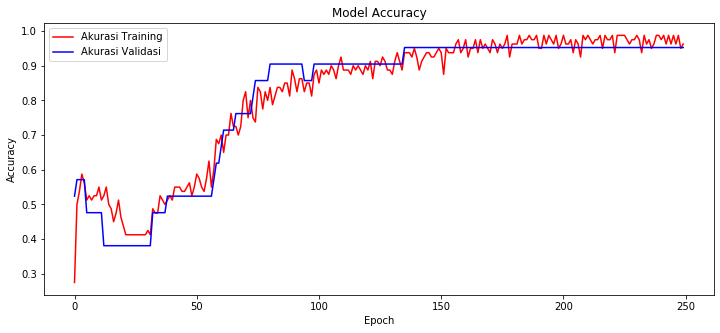

In [64]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

##### Grafik dibawah ini adalah grafik hasil dari loss akurasi

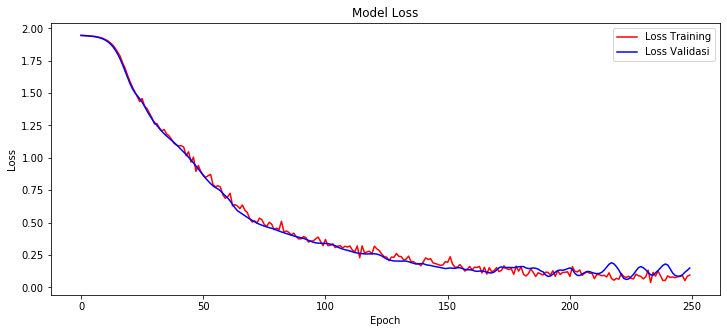

In [65]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

#### Model Predict dari data Training dan data Testing

In [66]:
y_pred = model.predict(X_training)
y_pred_test = model.predict(X_testing)

y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_test_cat = np.argmax(y_pred_test, axis=1)

y_training_cat = np.argmax(y_training, axis=1)
y_testing_cat = np.argmax(y_testing, axis=1)

# 8. Confusion Matriks

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi.

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_training_cat, y_pred_cat)
cm_test = confusion_matrix(y_testing_cat, y_pred_test_cat)

In [68]:
print(cm)
print(cm_test)

[[ 8  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0]
 [ 0  0 16  0  0  0  0]
 [ 0  0  0  3  1  0  0]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  6]]
[[2 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 3 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 2]]


In [69]:
cm_count=0
cm_wrong=0
for i in range(len(cm)):
    cm_count += cm[i,i]
    for v in range(len(cm)):
        cm_wrong += cm[i,v]
cm_wrong -= cm_count

In [70]:
cm_test_count=0
cm_test_wrong=0
for i in range(len(cm_test)):
    cm_test_count += cm_test[i,i]
    for v in range(len(cm_test)):
        cm_test_wrong += cm_test[i,v]
cm_test_wrong -= cm_test_count

Dibawah ini adalah rumus untuk menghitung akurasi berdasarkan perhitungan Confusion matriks dan akurasi data Testing

In [71]:
accuracy = cm_count/(cm_count + cm_wrong)
accuracy_test = cm_test_count/(cm_test_count + cm_test_wrong)

Dan berikut ini adalah hasil akurasi dari perhitungan Confusion Matriks dan hasil akurasi testing pada proses Epoch sebelumnya

In [72]:
print(accuracy)
print(acc_testing)

0.9875
[0.14958417415618896, 0.9523809552192688]


# 9. Kesimpulan

Setelah dilakukan percobaan dengan menggunakan Artificial Neural Network dengan proses Epoch sebanyak 250 kali dari dataset yang berjumlah 101 maka didapat hasil akurasi sebesar 95%